In [1]:
import pandas as pd
import libpysal
import geopandas as gpd
import numpy as np

geo_table = gpd.read_file(libpysal.examples.get_path('us48.shp'))
income_table = pd.read_csv(libpysal.examples.get_path("usjoin.csv"))
complete_table = geo_table.merge(income_table,left_on='STATE_NAME',right_on='Name')
complete_table.head()


,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,31528,32053,32206,32934,34984,35738,38477,40782,41588,40619
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,22569,24342,24699,25963,27517,28987,30942,32625,33293,32699
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,25623,27068,27731,28727,30201,30721,32340,33620,34906,35268
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,25068,26118,26770,29109,29676,31644,32856,35882,39009,38672
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,26115,27531,27727,30072,31765,32726,33320,35998,38188,36499


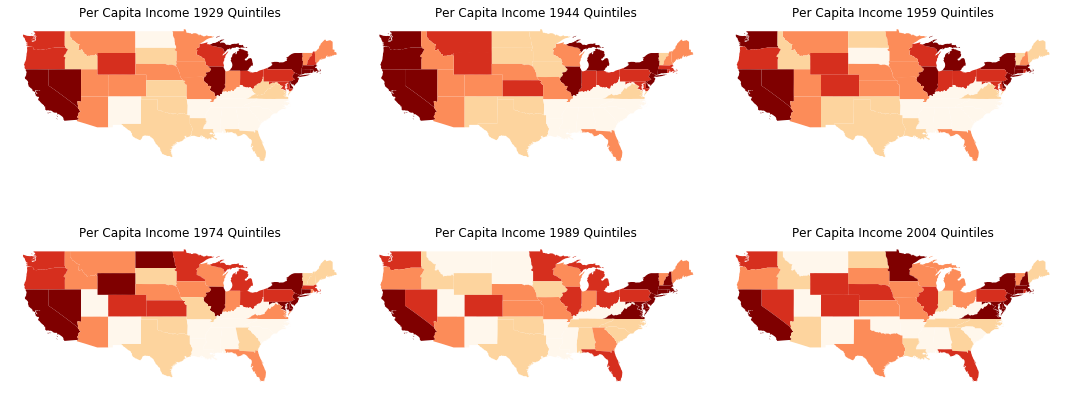

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

index_year = range(1929,2010,15)
fig, axes = plt.subplots(nrows=2, ncols=3,figsize = (15,7))
for i in range(2):
    for j in range(3):
        ax = axes[i,j]
        complete_table.plot(ax=ax, column=str(index_year[i*3+j]), cmap='OrRd', scheme='quantiles', legend=False)
        ax.set_title('Per Capita Income %s Quintiles'%str(index_year[i*3+j]))
        ax.axis('off')
        
        
        
plt.tight_layout()


Text(0.5, 1.0, 'Relative per capita incomes of 48 US states')

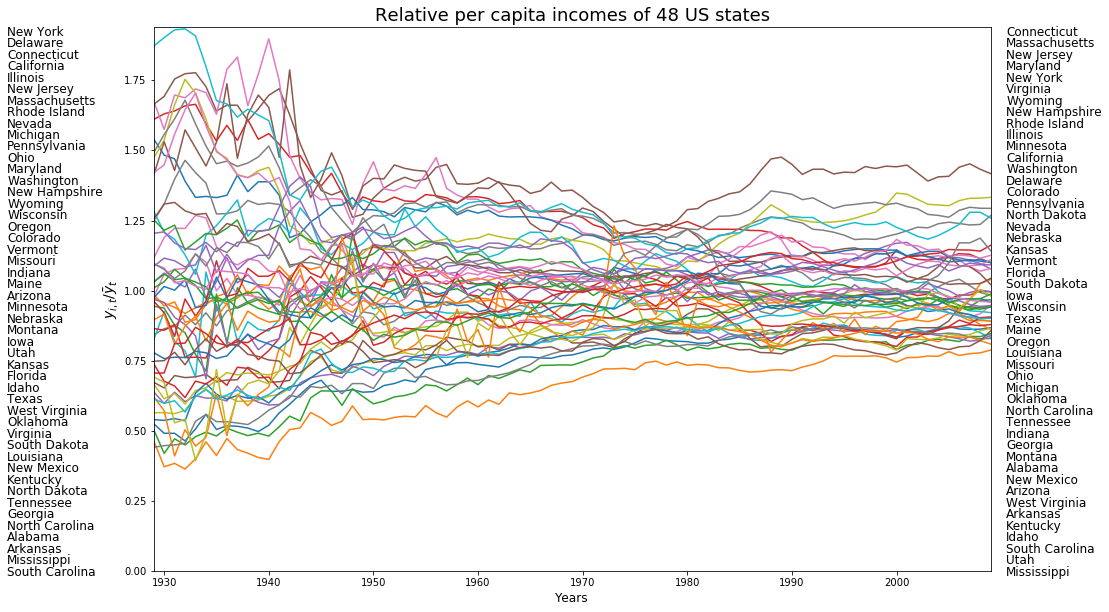

In [10]:
years = range(1929,2010)
names = income_table['Name']
pci = income_table.drop(['Name','STATE_FIPS'], 1).values.T
rpci= (pci.T / pci.mean(axis=1)).T
order1929 = np.argsort(rpci[0,:])
order2009 = np.argsort(rpci[-1,:])
names1929 = names[order1929[::-1]]
names2009 = names[order2009[::-1]]
first_last = np.vstack((names1929,names2009))
from pylab import rcParams
rcParams['figure.figsize'] = 15,10
p = plt.plot(years,rpci)
for i in range(48):
    plt.text(1915,1.91-(i*0.041), first_last[0][i],fontsize=12)
    plt.text(2010.5,1.91-(i*0.041), first_last[1][i],fontsize=12)
plt.xlim((years[0], years[-1]))
plt.ylim((0, 1.94))
plt.ylabel(r"$y_{i,t}/\bar{y}_t$",fontsize=14)
plt.xlabel('Years',fontsize=12)
plt.title('Relative per capita incomes of 48 US states',fontsize=18)



The above figure displays the trajectories of relative per capita incomes of 48 US states. It is quite obvious that states were swapping positions across 1929-2009. We will demonstrate how to quantify the exchange mobility as well as how to assess the regional and local contribution to the overall exchange mobility. We will ultilize BEA regions and base on it for constructing the block weight matrix.

BEA regional scheme divide US states into 8 regions:

    New England Region
    Mideast Region
    Great Lakes Region
    Plains Region
    Southeast Region
    Southwest Region
    Rocky Mountain Region
    Far West Region

As the dataset does not contain information regarding BEA regions, we manually input the regional information:


In [11]:
BEA_regions = ["New England Region","Mideast Region","Great Lakes Region","Plains Region","Southeast Region","Southwest Region","Rocky Mountain Region","Far West Region"]
BEA_regions_abbr = ["NENG","MEST","GLAK","PLNS","SEST","SWST","RKMT","FWST"]
BEA = pd.DataFrame({ 'Region code' : np.arange(1,9,1), 'BEA region' : BEA_regions,'BEA abbr':BEA_regions_abbr})
BEA

,Region code,BEA region,BEA abbr
0,1,New England Region,NENG
1,2,Mideast Region,MEST
2,3,Great Lakes Region,GLAK
3,4,Plains Region,PLNS
4,5,Southeast Region,SEST
5,6,Southwest Region,SWST
6,7,Rocky Mountain Region,RKMT
7,8,Far West Region,FWST


In [12]:
region_code = list(np.repeat(1,6))+list(np.repeat(2,6))+list(np.repeat(3,5))+list(np.repeat(4,7))+list(np.repeat(5,12))+list(np.repeat(6,4))+list(np.repeat(7,5))+list(np.repeat(8,6))
state_code = ['09','23','25','33','44','50','10','11','24','34','36','42','17','18','26','39','55','19','20','27','29','31','38','46','01','05','12','13','21','22','28','37','45','47','51','54','04','35','40','48','08','16','30','49','56','02','06','15','32','41','53']
state_region = pd.DataFrame({'Region code':region_code,"State code":state_code})
state_region_all = state_region.merge(BEA,left_on='Region code',right_on='Region code')
complete_table = complete_table.merge(state_region_all,left_on='STATE_FIPS_x',right_on='State code')
complete_table.head()


,AREA,PERIMETER,STATE_,STATE_ID,STATE_NAME,STATE_FIPS_x,SUB_REGION,STATE_ABBR,geometry,Name,...,2004,2005,2006,2007,2008,2009,Region code,State code,BEA region,BEA abbr
0,20.750,34.956,1,1,Washington,53,Pacific,WA,(POLYGON ((-122.400749206543 48.22539520263672...,Washington,...,34984,35738,38477,40782,41588,40619,8,53,Far West Region,FWST
1,45.132,34.527,2,2,Montana,30,Mtn,MT,POLYGON ((-111.4746322631836 44.70223999023438...,Montana,...,27517,28987,30942,32625,33293,32699,7,30,Rocky Mountain Region,RKMT
2,9.571,18.899,3,3,Maine,23,N Eng,ME,(POLYGON ((-69.77778625488281 44.0740737915039...,Maine,...,30201,30721,32340,33620,34906,35268,1,23,New England Region,NENG
3,21.874,21.353,4,4,North Dakota,38,W N Cen,ND,POLYGON ((-98.73005676269531 45.93829727172852...,North Dakota,...,29676,31644,32856,35882,39009,38672,4,38,Plains Region,PLNS
4,22.598,22.746,5,5,South Dakota,46,W N Cen,SD,POLYGON ((-102.7879333496094 42.99532318115234...,South Dakota,...,31765,32726,33320,35998,38188,36499,4,46,Plains Region,PLNS


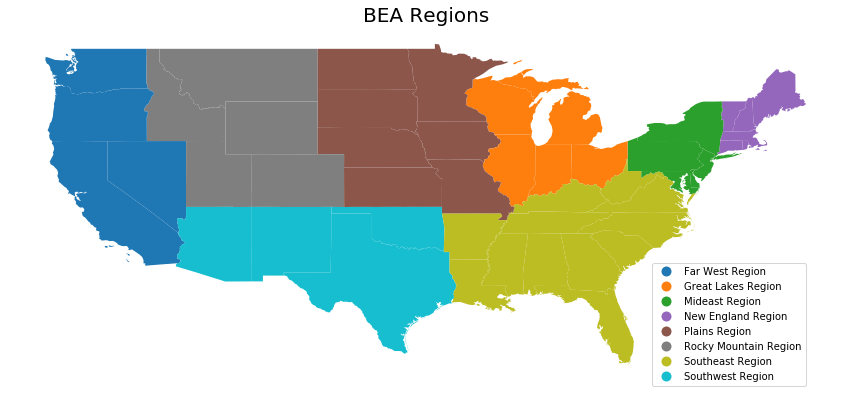

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize = (15,8))
beaplot = complete_table.plot(ax=ax,column="BEA region", legend=True)
leg = ax.get_legend()
leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
beaplot.set_title("BEA Regions",fontdict={"fontsize":20})
ax.set_axis_off()


## Kendall's $\tau$

Kendall’s τ statistic is based on a comparison of the number of pairs of n observations that have concordant ranks between two variables. For measuring exchange mobility in giddy, the two variables in question are the values of an attribute measured at two points in time over n spatial units. This classic measure of rank correlation indicates how much relative stability there has been in the map pattern over the two periods. Spatial decomposition of Kendall’s τ could be classified into three spatial scales: global spatial decomposition , inter- and intra-regional decomposition and local spatial decomposition. More details will be given latter.

Kendall's $\tau$ statistic is a global measure of exchange mobility. For $n$ spatial units over two periods, it is formally defined as:

$$\tau = \frac{c - d}{n(n-1)/2}$$



where $c$
is the number of concordant pairs or those $i,j$ where $sign(y_{i,t} - y_{j,t})=sign(y_{i,s} - y_{j,s})$ with $t$ and $s$ time indices. $d$ is the number of discordant pairs. 

As such, $-1 \le \tau \le 1$ with lower (higher) values indicating more (less) mobility.


In giddy, class Tau
requires two inputs: a cross-section of income values at one period (x) and a cross-section of income values at another period (y

):

giddy.rank.Tau(self, x, y)

We will construct a Tau
instance by specifying the incomes in two periods. Here, we look at the global exchange mobility of US states between 1929 and 2009.

In [15]:
import giddy

In [16]:
tau = giddy.rank.Tau(complete_table['1929'], complete_table['2009'])

In [17]:
tau.concordant

856.0

In [18]:
tau.discordant

271.0

In [19]:
tau.concordant + tau.discordant

1127.0

In [20]:
complete_table.shape

(48, 96)

In [21]:
48*47/2

1128.0

In [22]:
tau.tau

0.5188470576690462

In [23]:
tau.tau_p

1.9735720263920198e-07

## Spatial Kendall's $\tau$

he spatial Kendall's τ

decomposes all pairs into those that are spatial neighbors and those that are not, and examines whether the rank correlation is different between the two sets (Rey, 2014).
τw=ι′(W∘S)ιι′Wι

W
is the spatial weight matrix, S is the concordance matrix and ι is the (n,1) unity vector. The null hypothesis is the spatial randomness of rank exchanges. The inference of τw

could be conducted based on random spatial permutation of incomes at two periods.

giddy.rank.SpatialTau(self, x, y, w, permutations=0)

For illustration, we turn back to the case of incomes in US states over 1929-2009:


In [24]:
from libpysal.weights import block_weights
w = block_weights(complete_table["BEA region"])
np.random.seed(12345)
tau_w = giddy.rank.SpatialTau(complete_table["1929"],complete_table["2009"],w,999) 

/home/serge/anaconda3/envs/pysalworkshop/lib/python3.6/site-packages/libpysal/weights/weights.py:165: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


In [25]:
tau_w.concordant

856.0

In [26]:
tau_w.concordant_spatial

103

In [27]:
tau_w.discordant

271.0

In [28]:
tau_w.discordant_spatial

41

In [29]:
tau_w.tau_spatial

0.4305555555555556

In [30]:
tau_w.tau_spatial_psim

0.001